# Premier League Match Prediction

### Importing Necessary Libraries and Load The Dataset

In [1315]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
sns.set_palette("husl")
import warnings
warnings.filterwarnings('ignore')

In [1316]:
data = pd.read_csv('season-2425.csv')
data.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,16/08/24,Man United,Fulham,1,0,H,0,0,D,R Jones,...,5,2,12,10,7,8,2,3,0,0
1,17/08/24,Ipswich,Liverpool,0,2,A,0,0,D,T Robinson,...,2,5,9,18,2,10,3,1,0,0
2,17/08/24,Arsenal,Wolves,2,0,H,1,0,H,J Gillett,...,6,3,17,14,8,2,2,2,0,0
3,17/08/24,Everton,Brighton,0,3,A,0,1,A,S Hooper,...,1,5,8,8,1,5,1,1,1,0
4,17/08/24,Newcastle,Southampton,1,0,H,1,0,H,C Pawson,...,1,4,15,16,3,12,2,4,1,0


### Display Basic Info

In [1317]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      380 non-null    object
 1   HomeTeam  380 non-null    object
 2   AwayTeam  380 non-null    object
 3   FTHG      380 non-null    int64 
 4   FTAG      380 non-null    int64 
 5   FTR       380 non-null    object
 6   HTHG      380 non-null    int64 
 7   HTAG      380 non-null    int64 
 8   HTR       380 non-null    object
 9   Referee   380 non-null    object
 10  HS        380 non-null    int64 
 11  AS        380 non-null    int64 
 12  HST       380 non-null    int64 
 13  AST       380 non-null    int64 
 14  HF        380 non-null    int64 
 15  AF        380 non-null    int64 
 16  HC        380 non-null    int64 
 17  AC        380 non-null    int64 
 18  HY        380 non-null    int64 
 19  AY        380 non-null    int64 
 20  HR        380 non-null    int64 
 21  AR        380 no

In [1318]:
data.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1.513158,1.421053,0.752632,0.610526,13.752632,12.165789,4.834211,4.265789,10.789474,11.276316,5.426316,4.871053,1.905263,2.144737,0.068421,0.068421
std,1.277917,1.189922,0.875867,0.828831,5.588045,5.409987,2.488260,2.341636,3.639840,3.513257,3.183457,3.031358,1.395989,1.430021,0.263030,0.252800
min,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,10.000000,9.000000,3.000000,3.000000,8.000000,9.000000,3.000000,3.000000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,13.000000,11.500000,5.000000,4.000000,11.000000,11.000000,5.000000,4.000000,2.000000,2.000000,0.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000,17.000000,15.000000,6.000000,6.000000,13.000000,14.000000,7.000000,7.000000,3.000000,3.000000,0.000000,0.000000
max,7.000000,6.000000,4.000000,5.000000,36.000000,37.000000,16.000000,13.000000,21.000000,21.000000,17.000000,18.000000,7.000000,8.000000,2.000000,1.000000


In [1319]:
data.isnull().any()

Date        False
HomeTeam    False
AwayTeam    False
FTHG        False
FTAG        False
FTR         False
HTHG        False
HTAG        False
HTR         False
Referee     False
HS          False
AS          False
HST         False
AST         False
HF          False
AF          False
HC          False
AC          False
HY          False
AY          False
HR          False
AR          False
dtype: bool

In [1320]:
data.shape

(380, 22)

In [1321]:
data.duplicated().sum()

np.int64(0)

Convert date to datetime if present

In [1322]:
if 'date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'],dayfirst=True) # Adjust format if needed
    data = data.sort_values(by='Date').reset_index(drop=True)

Create target variable 'outcome' (H: Home win, A: Away win, D: Draw)

In [1323]:
if 'FTR' not in data.columns:
    data['FTR'] = 'D' # Default to Draw
    data.loc[data['FTHG']>data['FTAG'], 'FTR'] = 'H'
    data.loc[data['FTHG']<data['FTAG'], 'FTR'] = 'A'



Encode categorical variables (teams), check unique teams

In [1324]:
print(data['FTR'].value_counts())

FTR
H    155
A    132
D     93
Name: count, dtype: int64


### Exploratory Data Analysis

1. Distribution of Outcomes

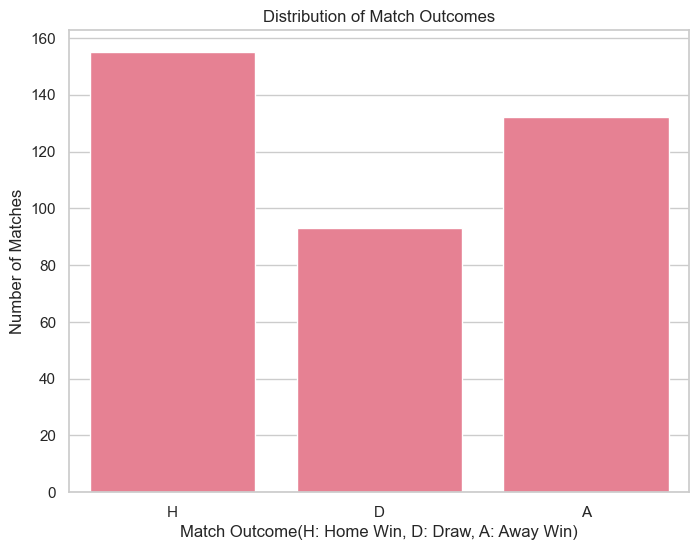

In [1325]:
plt.figure(figsize=(8,6))
sns.countplot(x='FTR', data=data, order=['H','D','A'])
plt.title('Distribution of Match Outcomes')
plt.xlabel('Match Outcome(H: Home Win, D: Draw, A: Away Win)')
plt.ylabel('Number of Matches')
plt.show()

2. Goals Scored by Home vs Away

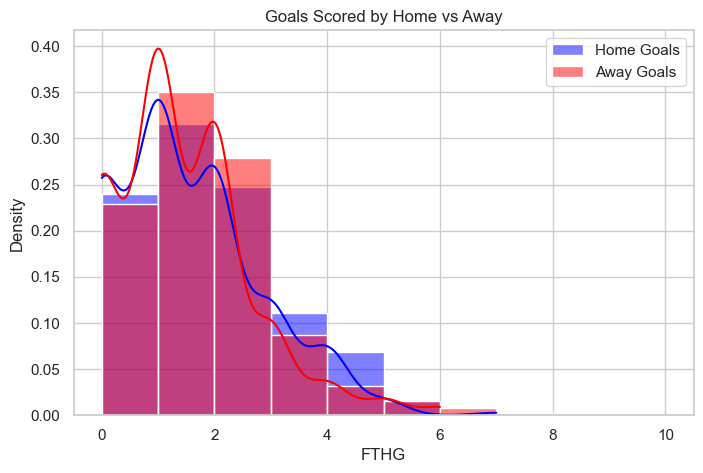

In [1326]:
plt.figure(figsize=(8,5))
sns.histplot(data['FTHG'],kde=True, color='blue', label='Home Goals', stat='density', bins=range(0,11))
sns.histplot(data['FTAG'],kde=True, color='red', label='Away Goals', stat='density', bins=range(0,11))
plt.title('Goals Scored by Home vs Away')
plt.legend()
plt.show()

3. Win Rates by Team (Top 5 Home Teams)

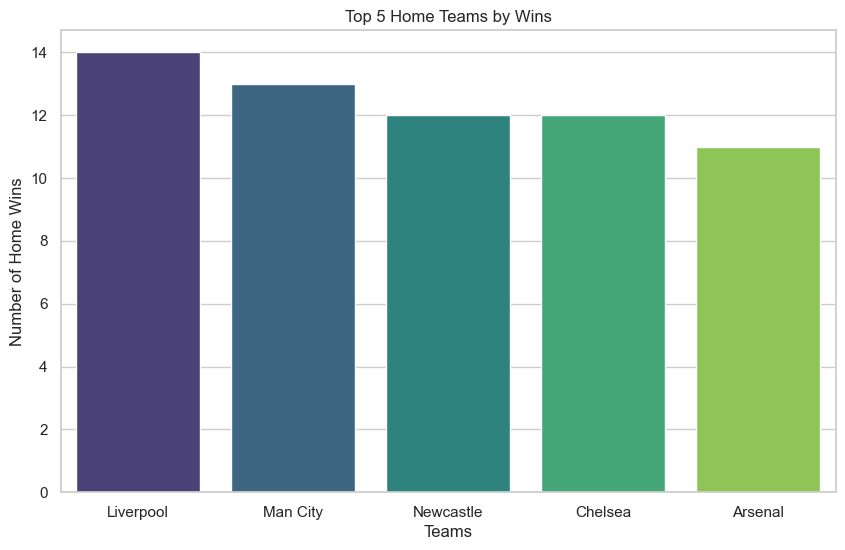

In [1327]:
home_wins = data[data['FTR']== 'H']['HomeTeam'].value_counts().head(5)
plt.figure(figsize=(10,6))
sns.barplot(x=home_wins.index, y=home_wins.values, palette='viridis')
plt.title('Top 5 Home Teams by Wins')
plt.xlabel('Teams')
plt.ylabel('Number of Home Wins')
plt.show()

4. Win Rates by Team (Top 5 Away Wins)

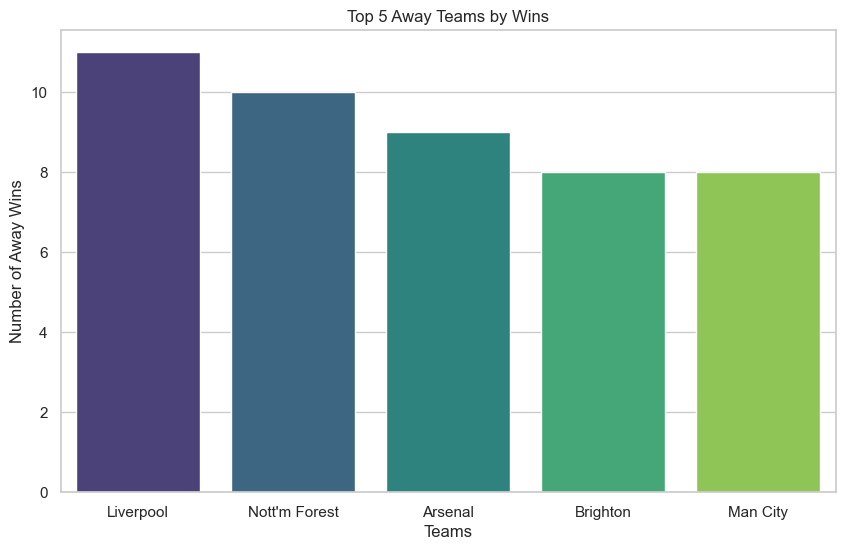

In [1328]:
away_wins = data[data['FTR']== 'A']['AwayTeam'].value_counts().head(5)
plt.figure(figsize=(10,6))
sns.barplot(x=away_wins.index, y=away_wins.values, palette='viridis')
plt.title('Top 5 Away Teams by Wins')
plt.xlabel('Teams')
plt.ylabel('Number of Away Wins')
plt.show()

5. Shots vs Goals Correlation

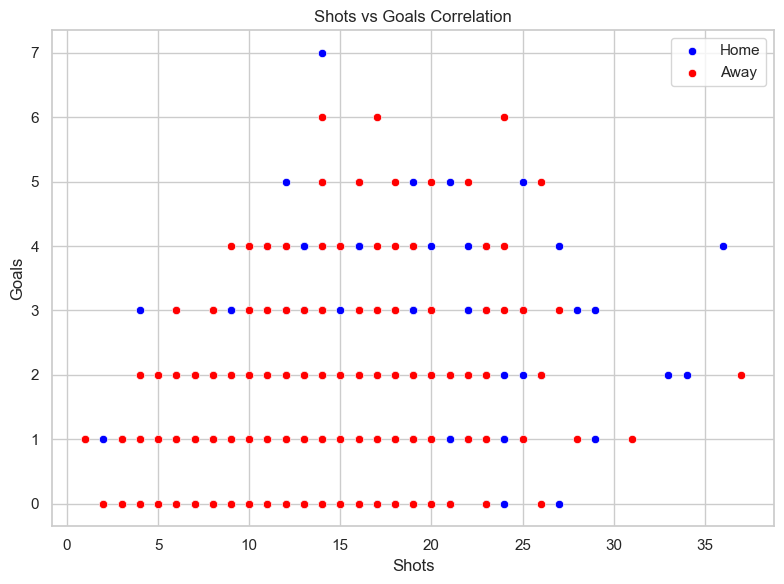

In [1329]:
if all(col in data.columns for col in ['HS','FTHG','AS','FTAG']):
    plt.figure(figsize=(8,6))
    sns.scatterplot(x='HS', y='FTHG', data=data, label='Home', color='blue')
    sns.scatterplot(x='AS', y='FTAG', data=data, label='Away', color='red')
    plt.title('Shots vs Goals Correlation')
    plt.xlabel('Shots')
    plt.ylabel('Goals')
    plt.legend()
    plt.tight_layout()
    plt.show()


6. Corner Distribution

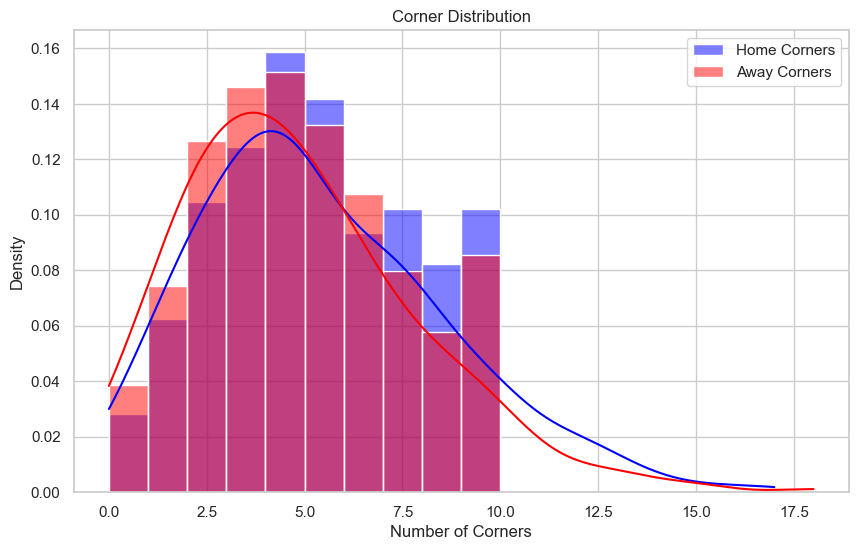

In [1330]:
if all(col in data.columns for col in ['HC','AC']):
    plt.figure(figsize=(10,6))
    sns.histplot(data['HC'], color='blue', label='Home Corners', kde=True, stat='density', bins=range(0,11))
    sns.histplot(data['AC'], color='red', label='Away Corners', kde=True, stat='density', bins=range(0,11))
    plt.title('Corner Distribution')
    plt.xlabel('Number of Corners')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

7. Cards Distribution

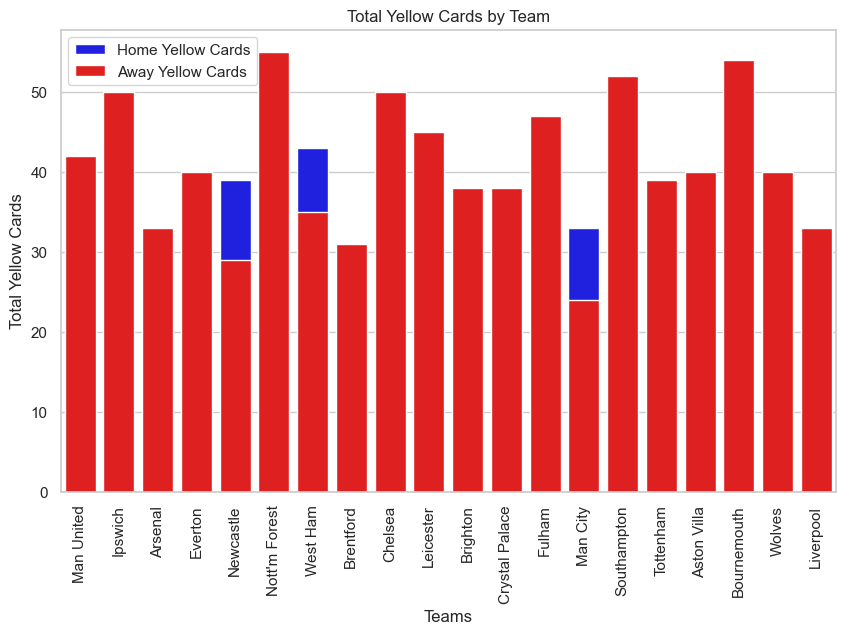

In [1331]:
if all(col in data.columns for col in ['HY','AY']):
    plt.figure(figsize=(10,6))
    sns.barplot(x='HomeTeam', y='HY', data=data, estimator=sum, ci=None, color='blue', label='Home Yellow Cards')
    sns.barplot(x='AwayTeam', y='AY', data=data, estimator=sum, ci=None, color='red', label='Away Yellow Cards')
    plt.title('Total Yellow Cards by Team')
    plt.xlabel('Teams')
    plt.ylabel('Total Yellow Cards')
    plt.xticks(rotation=90)
    plt.legend()
    plt.show()


8. Correlation Heatmap (Numeric Values only)

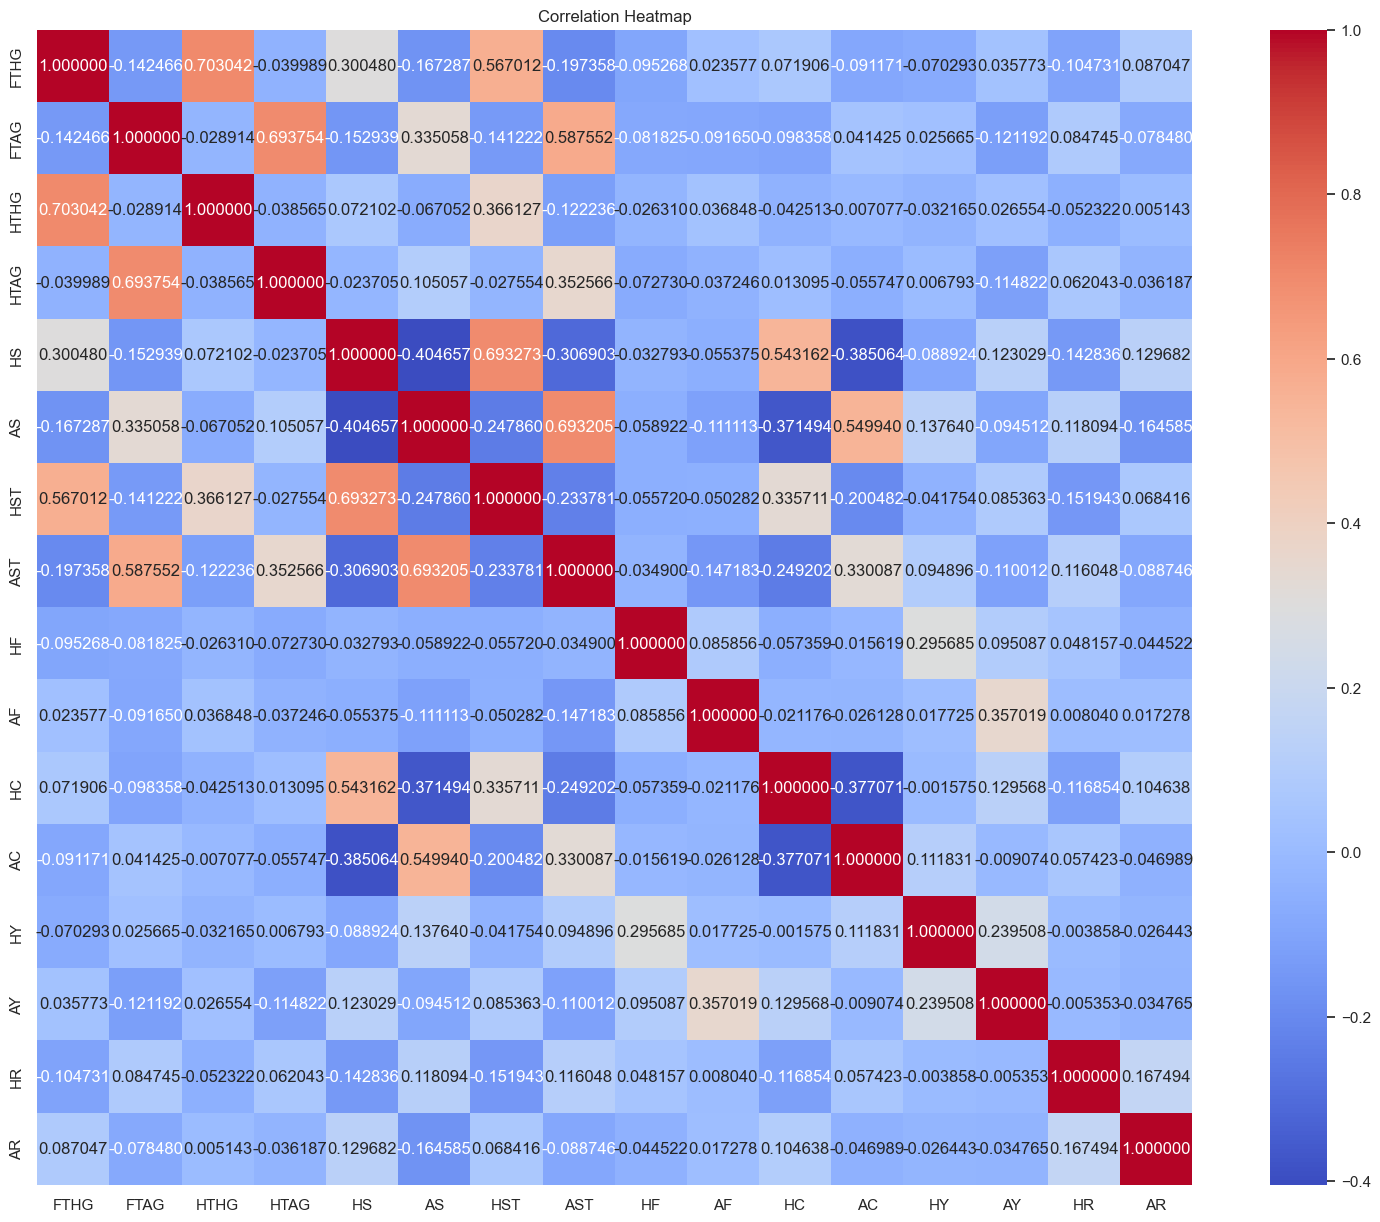

In [1332]:
numeric_cols = data.select_dtypes(include=np.number).columns
plt.figure(figsize=(20,15))
sns.heatmap(data=data[numeric_cols].corr(), annot=True, fmt="2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

9. Finding The Extreme Values

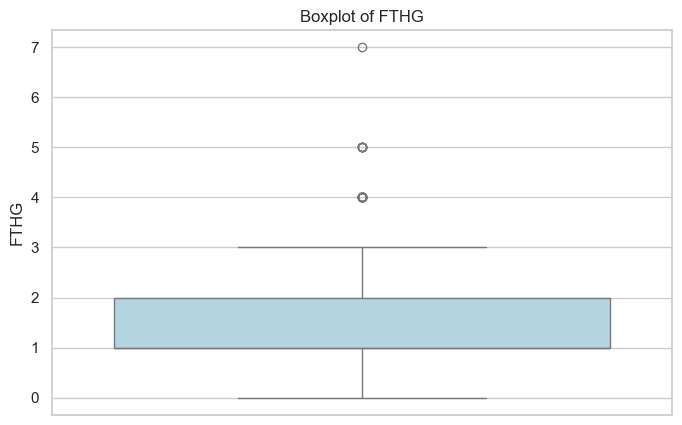

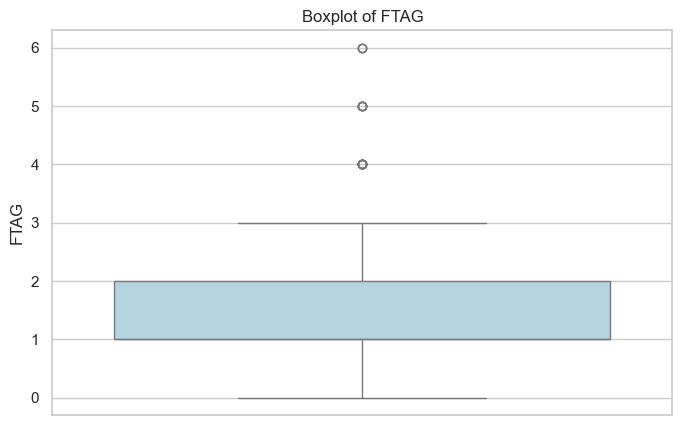

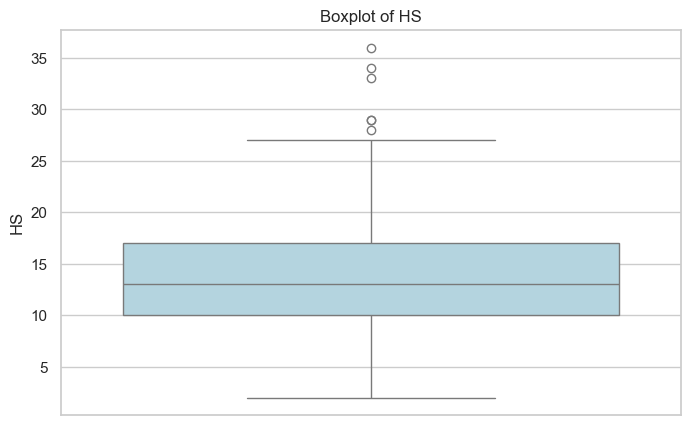

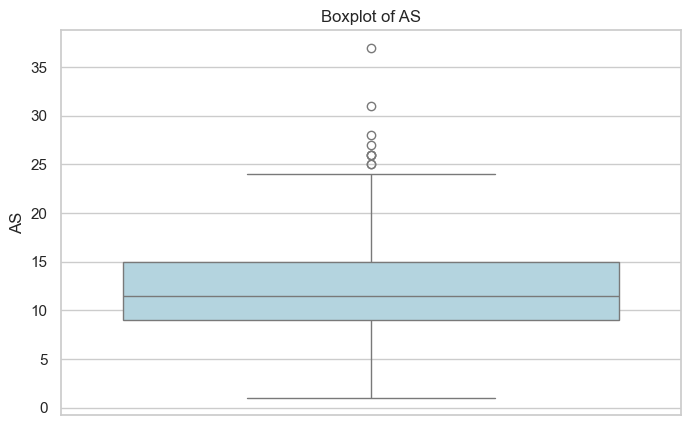

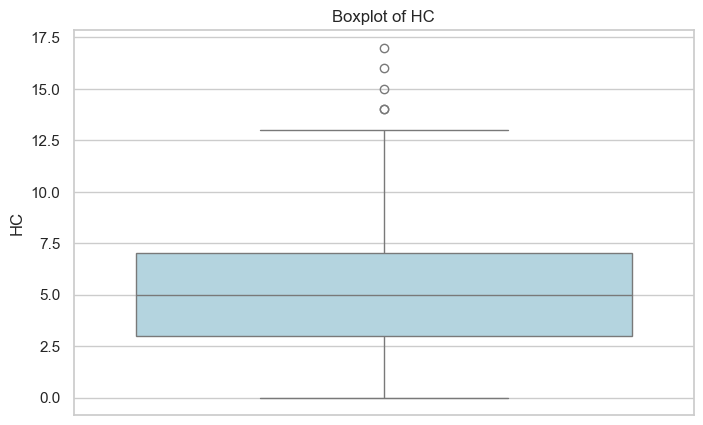

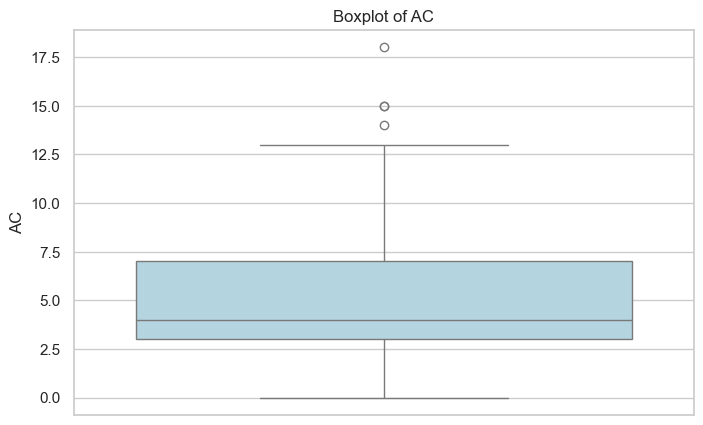

In [1333]:
boxplot_col = ['FTHG', 'FTAG', 'HS', 'AS','HC','AC']
for col in boxplot_col:
    if col in data.columns:
        plt.figure(figsize=(8,5))
        sns.boxplot(y=data[col], color='lightblue')
        plt.title(f'Boxplot of {col}')
        plt.ylabel(col)
        plt.show()

10. Additional Stats

In [1334]:
print("Extreme Values in Key Columns:")
for col in boxplot_col:
    if col in data.columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        extreme_values = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
        print(f"{col}: {len(extreme_values)} extreme values") 

Extreme Values in Key Columns:
FTHG: 33 extreme values
FTAG: 21 extreme values
HS: 6 extreme values
AS: 9 extreme values
HC: 5 extreme values
AC: 4 extreme values


In [1335]:
print("Outcome Percentages:\n",data['FTR'].value_counts(normalize=True) * 100)

Outcome Percentages:
 FTR
H    40.789474
A    34.736842
D    24.473684
Name: proportion, dtype: float64


In [1336]:
print("Averge Home Goals:", data['FTHG'].mean())

Averge Home Goals: 1.513157894736842


In [1337]:
print("Average Away Goals:", data['FTAG'].mean())

Average Away Goals: 1.4210526315789473


In [1338]:
print("Average Goals per Match:", (data['FTHG'].mean() + data['FTAG'].mean()))

Average Goals per Match: 2.9342105263157894


11. Log-Transform The Extreme Columns

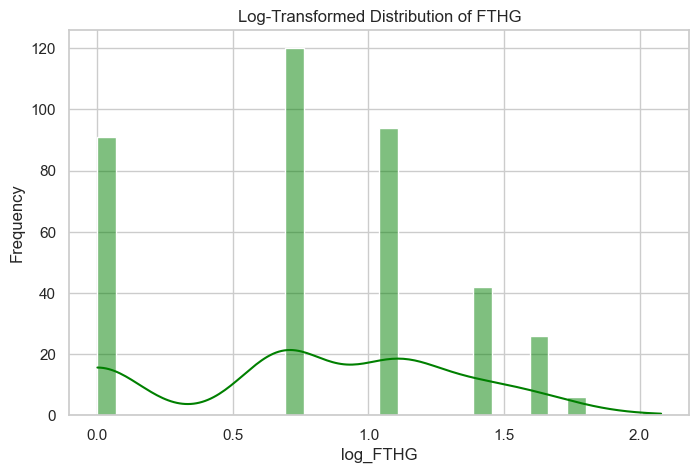

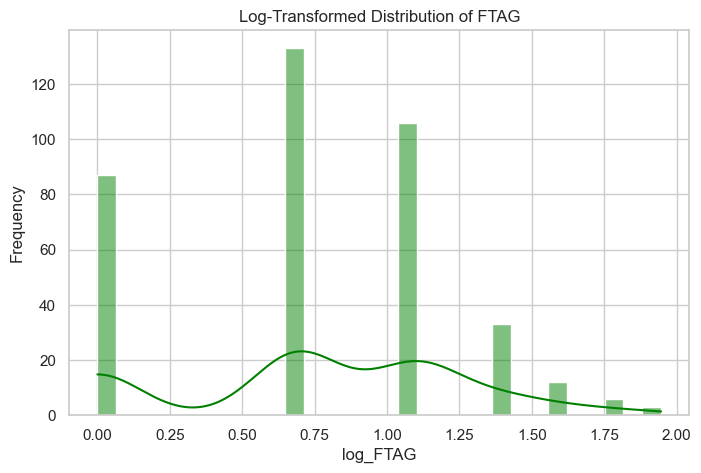

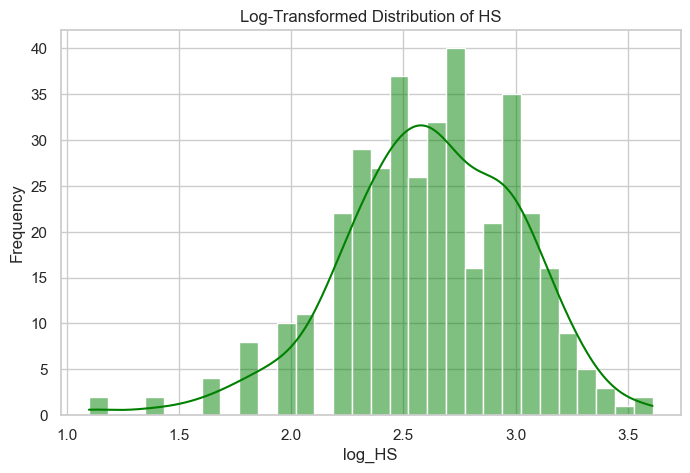

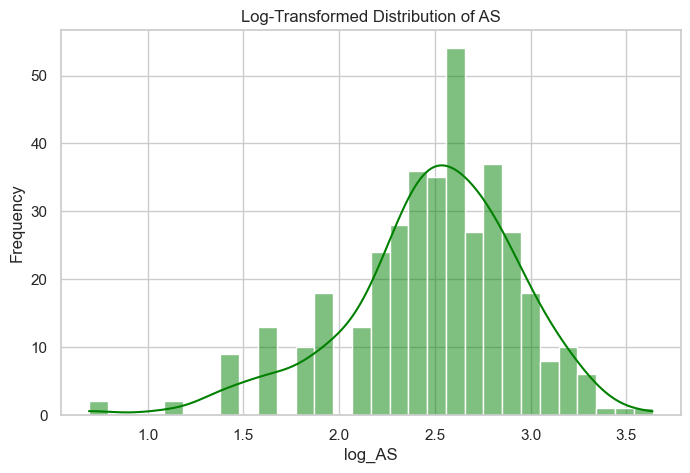

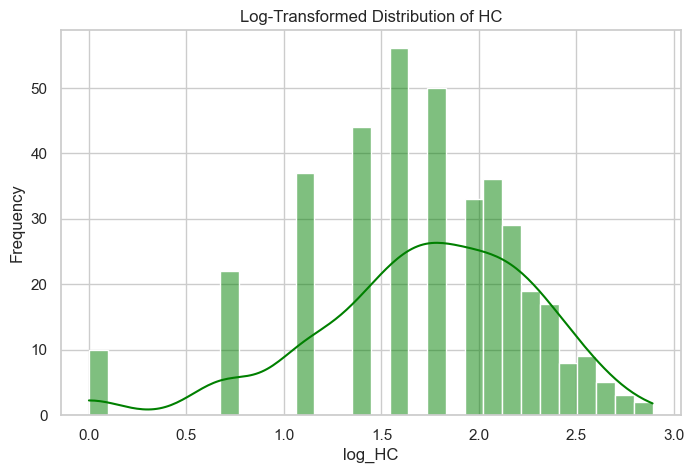

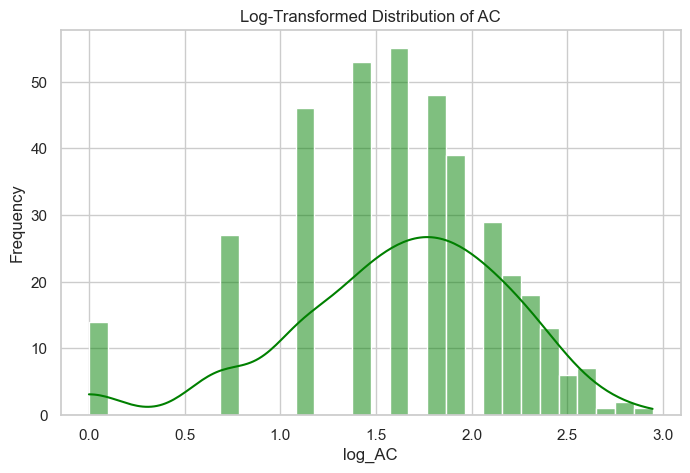

In [1339]:
log_transform_cols = ['FTHG', 'FTAG', 'HS', 'AS','HC','AC']
for col in log_transform_cols:
    if col in data.columns:
        data[f'log_{col}'] = np.log1p(data[col])
        plt.figure(figsize=(8,5))
        sns.histplot(data[f'log_{col}'], kde=True, color='green', bins=30)
        plt.title(f'Log-Transformed Distribution of {col}')
        plt.xlabel(f'log_{col}')
        plt.ylabel('Frequency')
        plt.show()

12. Goal Difference And Total Goals Per Match Distribution

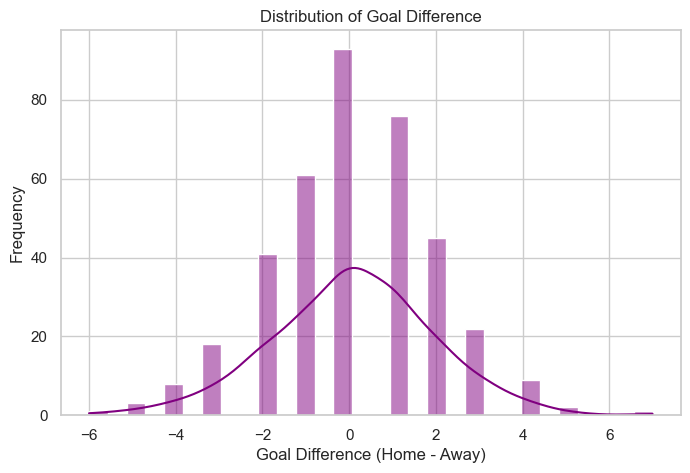

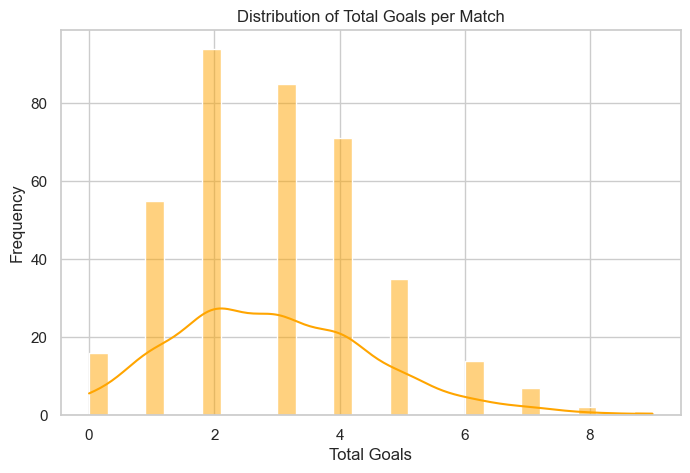

In [1340]:
if all(col in data.columns for col in ['FTHG','FTAG']):
    data['Goal_Diff'] = data['FTHG'] - data['FTAG']
    data['Total_Goals'] = data['FTHG'] + data['FTAG']
    plt.figure(figsize=(8,5))
    sns.histplot(data['Goal_Diff'], kde=True, color='purple', bins=30)
    plt.title('Distribution of Goal Difference')
    plt.xlabel('Goal Difference (Home - Away)')
    plt.ylabel('Frequency')
    plt.show()

    plt.figure(figsize=(8,5))
    sns.histplot(data['Total_Goals'], kde=True, color='orange', bins=30)
    plt.title('Distribution of Total Goals per Match')
    plt.xlabel('Total Goals')
    plt.ylabel('Frequency')
    plt.show()

### Feature Engineering

Sort by date 

In [1341]:
data = data.sort_values(by='Date').reset_index(drop=True)

Log-Transform for feature engineering

In [1342]:
log_transform_cols = ['HS', 'AS','HC','AC']
for col in log_transform_cols:
    if col in data.columns:
        data[col] = data[col].apply(lambda x: np.log1p(x))  # log1p to handle zero values

Shots On Target Ratio

In [1343]:
if all(col in data.columns for col in ['HST','AST','HS','AS']):
    data['Home_Shot_Accuracy'] = data['HST'] / data['HS']
    data['Away_Shot_Accuracy'] = data['AST'] / data['AS']
    data['Shot_Accuracy_Diff'] = data['Home_Shot_Accuracy'] - data['Away_Shot_Accuracy']
    data['Total_Shot_Accuracy'] = (data['HST'] + data['AST']) / (data['HS'] + data['AS'])   

Dominance Indicators

In [1344]:
if all(col in data.columns for col in ['HS','AS']):
    data['Shot_Dominance'] = data['HS'] - data['AS'] 
    data['Total_Shots'] = data['HS'] + data['AS']

if all(col in data.columns for col in ['HC','AC']):
    data['Corner_Dominance'] = data['HC'] - data['AC']
    data['Total_Corners'] = data['HC'] + data['AC']

Foul Balance

In [1345]:
if all(col in data.columns for col in ['HF','AF']):
    data['Foul_Balance'] = data['AF'] - data['HF']  # More away fouls = Home advantage

Discipline Indicators

In [1346]:
if all(col in data.columns for col in ['HY','AY','HR','AR']):
    data['Home_Discipline'] = data['HY'] + 2 * data['HR']
    data['Away_Discipline'] = data['AY'] + 2 * data['AR']
    data['Card_Difference'] = data['Away_Discipline'] - data['Home_Discipline']

Shot Efficiency

In [1347]:
data['Home_Shot_Efficiency'] = data['HST']/(data['HS']+data['HF'])
data['Away_Shot_Efficiency'] = data['AST']/(data['AS']+data['AF'])
data['Shot_Efficiency_Diff'] = data['Home_Shot_Efficiency'] - data['Away_Shot_Efficiency']  

In [1348]:
data.drop(columns=['Referee', 'Unnamed: 0'], inplace=True, errors='ignore')

Select Features And Target

In [1349]:
features = [col for col in data.columns if col.startswith(('Home_','Away_','Shot_','Foul_','Corner_','Card_','Total_'))] 
X = data[features]  # Feature matrix
y = data['FTR'] # Target variable

print("Feature Matrix Shape:", X.shape)

Feature Matrix Shape: (380, 16)


In [1350]:
X

,Total_Goals,Home_Shot_Accuracy,Away_Shot_Accuracy,Shot_Accuracy_Diff,Total_Shot_Accuracy,Shot_Dominance,Total_Shots,Corner_Dominance,Total_Corners,Foul_Balance,Home_Discipline,Away_Discipline,Card_Difference,Home_Shot_Efficiency,Away_Shot_Efficiency,Shot_Efficiency_Diff
0,4,1.116221,1.846347,-0.730126,1.555621,-0.916291,4.499810,0.223144,2.995732,2,1,2,1,0.256681,0.466938,-0.210257
1,7,3.323424,2.085162,1.238262,2.741902,0.310155,5.105945,-0.336472,3.555348,5,1,3,2,0.840489,0.324720,0.515769
2,2,1.107808,2.336657,-1.228849,1.753223,-0.287682,5.703782,0.000000,2.772589,-6,2,3,1,0.169414,0.583541,-0.414126
3,4,2.652462,0.434294,2.218168,1.618895,0.336472,4.941642,-0.154151,3.737670,6,0,0,0,0.726212,0.065348,0.660864
4,3,2.164043,1.737178,0.426865,1.970376,0.470004,5.075174,-0.405465,1.791759,3,0,3,3,0.435648,0.245360,0.190288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,5,2.716986,2.421834,0.295152,2.570777,0.054067,5.834811,0.587787,3.806662,-5,2,1,-1,0.894410,1.799314,-0.904903
376,2,1.609718,1.737178,-0.127460,1.671021,0.182322,4.787492,0.251314,4.143135,0,2,3,1,0.228769,0.231179,-0.002411
377,4,0.834065,2.517264,-1.683199,1.793417,-0.780159,5.575949,-1.098612,3.871201,-7,3,2,-1,0.161318,1.294906,-1.133588
378,3,1.302883,2.085162,-0.782279,1.701954,-0.095310,4.700480,-0.916291,2.302585,8,4,5,1,0.196045,0.213694,-0.017649


In [1351]:
print("Target Variable Distribution:\n", y.value_counts())

Target Variable Distribution:
 FTR
H    155
A    132
D     93
Name: count, dtype: int64


### Data Splitting

In [1352]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Training Set Shape:", X_train.shape)
print("Test Set Shape:", X_test.shape) 

Training Set Shape: (266, 16)
Test Set Shape: (114, 16)


### Model Preparation, Training and Evaluation

In [1353]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

Encode Target (H/D/A to 0/1/2)

In [1354]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

Scale Features 

In [1355]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Function To Train And Evaluate a Model

In [1356]:
def train_evaluate(model, param_grid=None,is_voting=False):
    if not is_voting and param_grid:
        grid = GridSearchCV(model, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
        grid.fit(X_train_scaled, y_train_encoded)
        best_model = grid.best_estimator_
        print(f"Best Parameters: {grid.best_params_}")
    else:
        best_model = model
        best_model.fit(X_train_scaled, y_train_encoded) if not hasattr(model, "estimators_") else best_model.fit(X_train_scaled, y_train_encoded)
    
    y_pred = best_model.predict(X_test_scaled)
    y_proba = best_model.predict_proba(X_test_scaled) if hasattr(best_model, "predict_proba") else None 
    
    accuracy = accuracy_score(y_test_encoded, y_pred)
    f1 = f1_score(y_test_encoded, y_pred, average='weighted')
    
    
    cm = confusion_matrix(y_test_encoded, y_pred)

    
    feature_imp_df = None
    if hasattr(best_model, 'feature_importances_'):
        importances = best_model.feature_importances_
        feature_imp_df = pd.DataFrame({'Features': X.columns, 'Importances': importances}, index=None).sort_values(by='Importances', ascending=False)
        print("Feature Importances:\n", feature_imp_df)

    print("Classification Report:\n", classification_report(y_test_encoded, y_pred, target_names=le.classes_))
    print("Confusion Matrix:\n", confusion_matrix(y_test_encoded, y_pred))
    
    
    return accuracy, f1, y_proba, best_model, feature_imp_df 

Function For Confusion Matrix

In [1357]:
def plot_confusion_matrix(model_name, cm):
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

Function To Plot Feature Importances

In [1358]:
def plot_feature_importance(feature_imp_df, model_name):
    if feature_imp_df is not None:
        plt.figure(figsize=(8,6))
        sns.barplot(x='Importances', y='Features', data=feature_imp_df.head(10), palette='viridis')
        plt.title(f'Top 10 Feature Importances - {model_name}')
        plt.xlabel('Importance Score')
        plt.ylabel('Features')
        plt.show()

Logistic Regression

In [1359]:
log_reg = LogisticRegression(penalty='l2',multi_class='multinomial', max_iter=1000,random_state=42) 
print("Logistic Regression Results:")
log_accuracy, log_f1, log_y_proba, log_model, log_feature_imp = train_evaluate(log_reg, param_grid={'C':[0.1,1,10]})

Logistic Regression Results:
Best Parameters: {'C': 1}
Classification Report:
               precision    recall  f1-score   support

           A       0.60      0.60      0.60        40
           D       0.17      0.14      0.16        28
           H       0.61      0.67      0.64        46

    accuracy                           0.52       114
   macro avg       0.46      0.47      0.47       114
weighted avg       0.50      0.52      0.51       114

Confusion Matrix:
 [[24 11  5]
 [ 9  4 15]
 [ 7  8 31]]


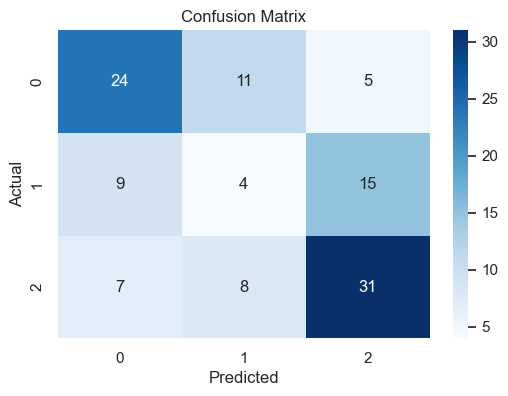

In [1360]:
plot_confusion_matrix(log_model, confusion_matrix(y_test_encoded, log_model.predict(X_test_scaled)))

Decision Tree

In [1361]:
dt = DecisionTreeClassifier(random_state=42,class_weight='balanced')
print("Decision Tree Results:")
dt_accuracy, dt_f1, dt_y_proba, dt_model, dt_feature_imp = train_evaluate(dt, param_grid={'max_depth':[5,6,7,9]})

Decision Tree Results:
Best Parameters: {'max_depth': 7}
Feature Importances:
                 Features  Importances
3     Shot_Accuracy_Diff     0.228069
6            Total_Shots     0.140201
15  Shot_Efficiency_Diff     0.134418
0            Total_Goals     0.106545
5         Shot_Dominance     0.068570
10       Home_Discipline     0.053805
11       Away_Discipline     0.049011
4    Total_Shot_Accuracy     0.045964
1     Home_Shot_Accuracy     0.045800
14  Away_Shot_Efficiency     0.034079
8          Total_Corners     0.028595
2     Away_Shot_Accuracy     0.026691
13  Home_Shot_Efficiency     0.013607
7       Corner_Dominance     0.010644
12       Card_Difference     0.009178
9           Foul_Balance     0.004823
Classification Report:
               precision    recall  f1-score   support

           A       0.57      0.50      0.53        40
           D       0.33      0.36      0.34        28
           H       0.59      0.63      0.61        46

    accuracy                     

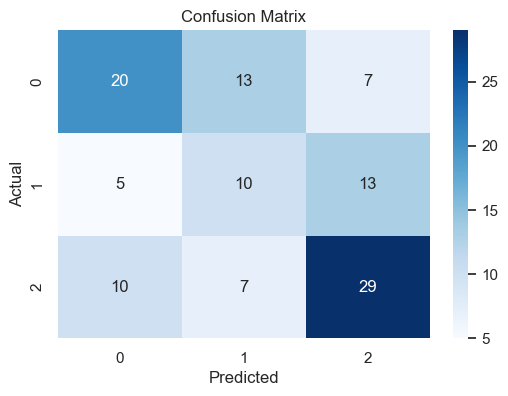

In [1362]:
plot_confusion_matrix(dt,confusion_matrix(y_test_encoded, dt_model.predict(X_test_scaled)))

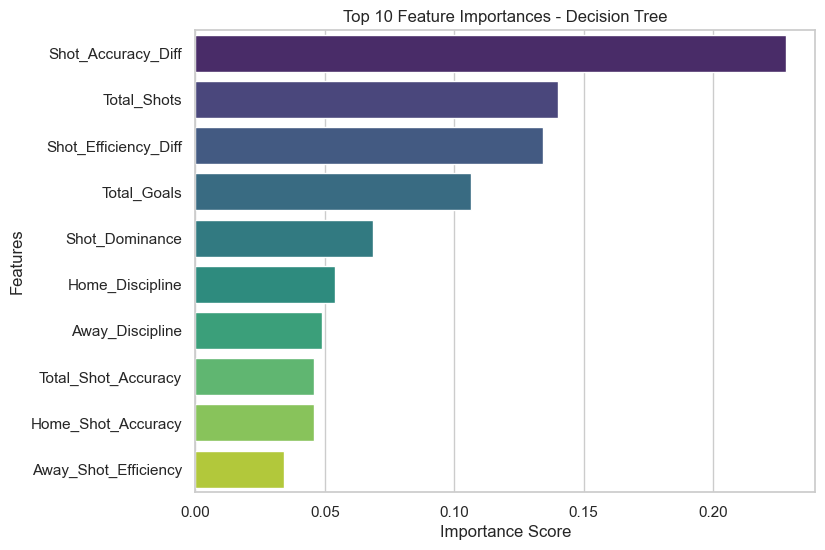

In [1363]:
plot_feature_importance(dt_feature_imp, "Decision Tree")

Random Forest

In [1364]:
rf = RandomForestClassifier(random_state=42)
print("Random Forest Results:")
rf_accuracy, rf_f1, rf_y_proba, rf_model, rf_feature_imp = train_evaluate(rf, param_grid={'n_estimators':[50,100],'max_depth':[3,5,7,9]}) 

Random Forest Results:
Best Parameters: {'max_depth': 7, 'n_estimators': 50}
Feature Importances:
                 Features  Importances
3     Shot_Accuracy_Diff     0.130135
1     Home_Shot_Accuracy     0.107749
15  Shot_Efficiency_Diff     0.100746
5         Shot_Dominance     0.074181
2     Away_Shot_Accuracy     0.068862
0            Total_Goals     0.064548
13  Home_Shot_Efficiency     0.062490
6            Total_Shots     0.058913
4    Total_Shot_Accuracy     0.055891
14  Away_Shot_Efficiency     0.050221
8          Total_Corners     0.044982
7       Corner_Dominance     0.044247
11       Away_Discipline     0.041133
10       Home_Discipline     0.036224
9           Foul_Balance     0.035378
12       Card_Difference     0.024302
Classification Report:
               precision    recall  f1-score   support

           A       0.62      0.75      0.68        40
           D       0.55      0.21      0.31        28
           H       0.62      0.74      0.67        46

    accuracy 

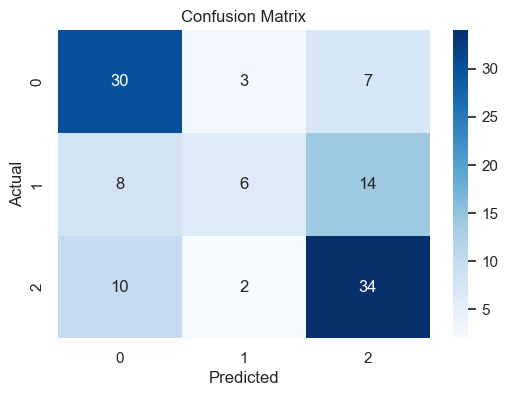

In [1365]:
plot_confusion_matrix(rf,confusion_matrix(y_test_encoded, rf_model.predict(X_test_scaled)))

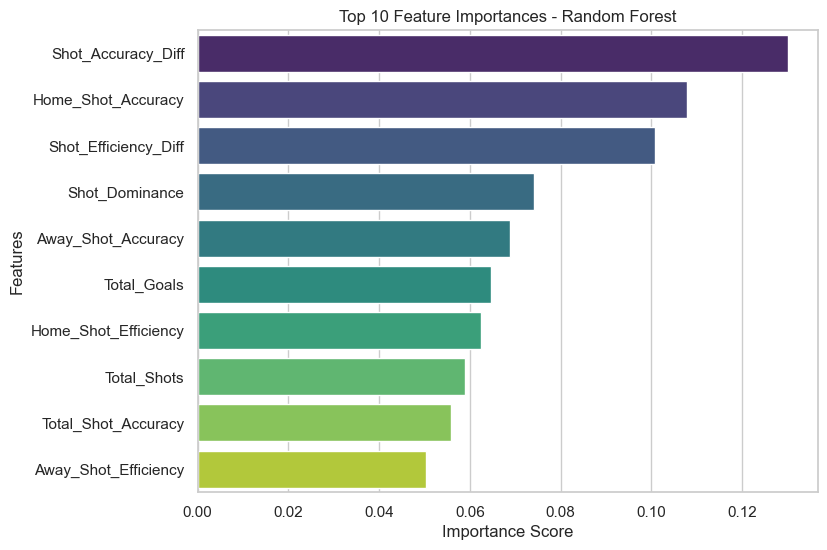

In [1366]:
plot_feature_importance(rf_feature_imp, "Random Forest")

Support Vector Machine

In [1367]:
svm = SVC(probability=True,kernel='rbf', random_state=42) 
print("Support Vector Machine Results:")
svm_accuracy, svm_f1, svm_y_proba, svm_model, svm_feature_imp = train_evaluate(svm, param_grid={'C':[0.1,1,10,100], 'gamma':['scale','auto']})

Support Vector Machine Results:
Best Parameters: {'C': 1, 'gamma': 'scale'}
Classification Report:
               precision    recall  f1-score   support

           A       0.63      0.60      0.62        40
           D       0.15      0.11      0.12        28
           H       0.59      0.72      0.65        46

    accuracy                           0.53       114
   macro avg       0.46      0.47      0.46       114
weighted avg       0.50      0.53      0.51       114

Confusion Matrix:
 [[24 10  6]
 [ 8  3 17]
 [ 6  7 33]]


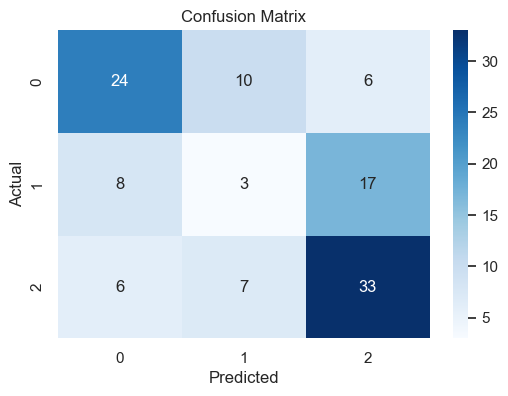

In [1368]:
plot_confusion_matrix(svm,confusion_matrix(y_test_encoded, svm_model.predict(X_test_scaled)))

Voting Classifier

In [1369]:
estimators = [('Logistic Regression', log_reg),
              ('Decision Tree', dt),
              ('Random Forest', rf),
              ('SVM', svm)]

In [1370]:
voting_clf = VotingClassifier(estimators=estimators, voting='soft')
print("Voting Classifier Results:")
voting_accuracy, voting_f1, voting_y_proba, voting_model, voting_feature_imp = train_evaluate(voting_clf, is_voting=True)   

Voting Classifier Results:
Classification Report:
               precision    recall  f1-score   support

           A       0.60      0.60      0.60        40
           D       0.39      0.32      0.35        28
           H       0.65      0.72      0.68        46

    accuracy                           0.58       114
   macro avg       0.55      0.55      0.54       114
weighted avg       0.57      0.58      0.57       114

Confusion Matrix:
 [[24 11  5]
 [ 6  9 13]
 [10  3 33]]


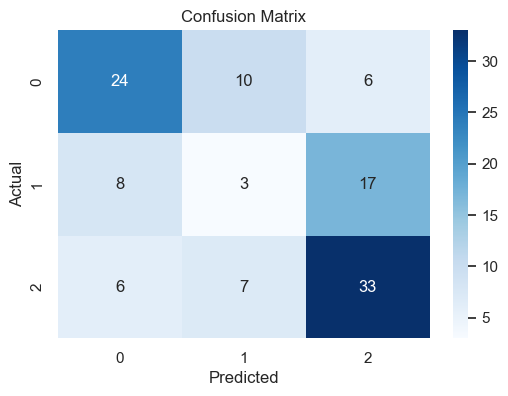

In [1371]:
plot_confusion_matrix(voting_clf,confusion_matrix(y_test_encoded, svm_model.predict(X_test_scaled)))

Comparison Of Models

In [1372]:
models_comparison=pd.DataFrame({
    'Model':['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'Voting Classifier'],
     'Accuracy':[log_accuracy, dt_accuracy, rf_accuracy, svm_accuracy, voting_accuracy],
     'F1 Score':[log_f1, dt_f1, rf_f1, svm_f1, voting_f1]
})      

print("Models Comparison:\n", models_comparison)

Models Comparison:
                  Model  Accuracy  F1 Score
0  Logistic Regression  0.517544  0.506967
1        Decision Tree  0.517544  0.518182
2        Random Forest  0.614035  0.586477
3                  SVM  0.526316  0.507720
4    Voting Classifier  0.578947  0.571766


Plotting For Comparison

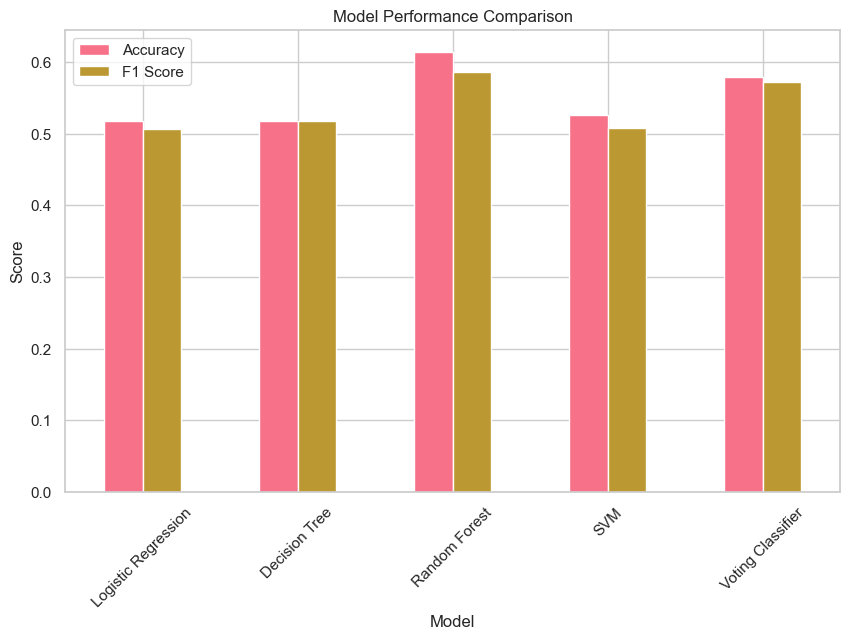

In [1373]:
models_comparison.plot(x='Model', y=['Accuracy', 'F1 Score'], kind='bar', figsize=(10,6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()